

# Implementação e Análise de Algoritmos de Implementação

### Integrantes: 
João Canavarro

Renan Cunha

Ronaldd Pinho

Wagner Felidré

In [57]:
# Importando Libs
import sys
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
import timeit
sys.path.append("algoritmos/")

## Questão 1

In [59]:
def quick_sort(ARRAY):
    ARRAY_LENGTH = len(ARRAY)
    if( ARRAY_LENGTH <= 1):
        return ARRAY
    else:
        PIVOT = ARRAY[(ARRAY_LENGTH//2)-1]    #pivô no meio.
        GREATER = [ element for element in ARRAY[1:] if element > PIVOT ]
        LESSER = [ element for element in ARRAY[1:] if element <= PIVOT ]
        return quick_sort(LESSER) + [PIVOT] + quick_sort(GREATER)

In [60]:
def quick_sort_modificado(ARRAY):
    ARRAY_LENGTH = len(ARRAY)
    if( ARRAY_LENGTH <= 1):
        return ARRAY
    else:
        PIVOT = ARRAY[random.randint(0,ARRAY_LENGTH-1)]  #pivô é um elemento aleatório
        GREATER = [ element for element in ARRAY[1:] if element > PIVOT ]
        LESSER = [ element for element in ARRAY[1:] if element <= PIVOT ]
        return quick_sort(LESSER) + [PIVOT] + quick_sort(GREATER)

## a)Sequência aleatória de números entre 1 e 100. 

In [61]:
print("100 Elementos -> Pivô no meio.\n")

x = [random.randint(1,100) for l in range (100)]

print("Lista x Desornada:",x)
print("Lista x Ordenada:",quick_sort(x))


100 Elementos -> Pivô no meio.

Lista x Desornada: [24, 20, 6, 40, 74, 74, 8, 90, 84, 21, 88, 56, 42, 81, 98, 69, 50, 6, 13, 38, 37, 16, 21, 66, 75, 35, 86, 1, 5, 88, 74, 27, 59, 19, 15, 80, 2, 81, 19, 62, 8, 9, 99, 10, 69, 54, 82, 33, 51, 95, 85, 12, 100, 96, 54, 74, 57, 62, 96, 10, 37, 18, 3, 69, 60, 18, 37, 10, 89, 94, 18, 49, 86, 53, 32, 28, 89, 81, 64, 19, 100, 73, 32, 61, 31, 84, 60, 22, 30, 14, 63, 85, 85, 63, 95, 98, 14, 71, 64, 57]
Lista x Ordenada: [2, 3, 5, 5, 5, 6, 8, 9, 9, 10, 10, 12, 12, 12, 14, 14, 18, 18, 18, 18, 18, 18, 19, 19, 22, 30, 31, 31, 32, 32, 32, 33, 37, 37, 37, 37, 37, 37, 37, 38, 49, 51, 51, 51, 51, 53, 54, 54, 54, 57, 60, 60, 60, 61, 62, 62, 62, 62, 63, 63, 63, 64, 64, 69, 69, 69, 71, 73, 74, 74, 74, 75, 80, 80, 81, 81, 82, 82, 84, 84, 85, 85, 86, 86, 89, 89, 89, 89, 89, 94, 95, 95, 95, 96, 96, 96, 98, 100, 100, 100]


## b)Qual a complexidade no tempo do algoritmo?

<font size = 4>
<br>
Sua complexidade no melhor caso é Ô(nlog2(n)) e no pior caso é Ô(n²). Escolhemos o pivô aleatoriamente para obter bom desempenho no caso médio sobre todas as entradas.

</font>

## c)Comparar -> Sequencia Aleatória x Ordenada (Cresc/Decre).

->Pivô no meio.

Média Desordenado 1 000 - 20 000 elem.: 1.11980310676
Média Crescente 1 000 - 20 000 elem.: 0.7736880974
Média Decrescente 1 000 - 20 000 elem.: 0.832242755344


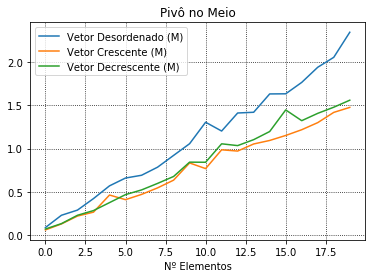

In [62]:
print("->Pivô no meio.\n")
tx = []
tcresc = []
tdecre = []
i = 1000

while (i <= 20000):
    x = [random.randint(1,i)for l in range (i)]
    cresc = [l for l in range (i)]
    decre = [l for l in range(i-1, -1, -1)]

    #Desordenado
    tx.append(timeit.timeit(lambda:quick_sort(x),number = 40))
    #Crescente
    tcresc.append(timeit.timeit(lambda:quick_sort(cresc),number = 40))
    #Decrescente
    tdecre.append(timeit.timeit(lambda:quick_sort(decre),number = 40))
    i+=1000

print("Média Desordenado 1 000 - 20 000 elem.:",np.mean(tx))
print("Média Crescente 1 000 - 20 000 elem.:",np.mean(tcresc))
print("Média Decrescente 1 000 - 20 000 elem.:",np.mean(tdecre))

num_elementos = np.arange(len(tx))

plt.plot(num_elementos,tx,label = 'Vetor Desordenado (M)')
plt.plot(num_elementos,tcresc,label = 'Vetor Crescente (M)')
plt.plot(num_elementos,tdecre,label = 'Vetor Decrescente (M)')

plt.legend()
plt.title("Pivô no Meio")
plt.xlabel("Nº Elementos")
plt.grid(linestyle = ':', color = 'k')
plt.show()

## d)Algoritmo modificado: Pivô aleatório.


--------------------------
100 Elementos -> Pivô aleatório.

Lista x Desornada: [50, 81, 24, 15, 44, 97, 72, 39, 58, 38, 27, 89, 28, 67, 9, 69, 40, 81, 43, 46, 100, 54, 39, 71, 37, 78, 1, 11, 63, 76, 91, 16, 15, 50, 10, 42, 14, 60, 24, 29, 55, 17, 45, 36, 11, 66, 19, 81, 97, 9, 16, 3, 52, 51, 61, 36, 55, 20, 71, 74, 94, 46, 83, 89, 24, 55, 65, 38, 66, 24, 76, 30, 71, 74, 15, 51, 89, 43, 63, 26, 24, 46, 79, 71, 91, 71, 34, 30, 12, 96, 88, 14, 51, 96, 13, 33, 79, 9, 18, 68]
Lista x Ordenada: [3, 9, 9, 9, 10, 10, 11, 11, 11, 12, 12, 13, 14, 15, 16, 16, 17, 18, 19, 19, 19, 20, 20, 24, 24, 24, 24, 26, 30, 30, 30, 33, 34, 36, 36, 36, 37, 37, 38, 42, 42, 43, 46, 46, 46, 46, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 55, 55, 55, 55, 60, 61, 61, 63, 63, 65, 65, 66, 66, 66, 68, 71, 71, 71, 71, 71, 72, 74, 74, 74, 76, 76, 79, 79, 81, 81, 83, 83, 88, 89, 89, 89, 91, 94, 94, 94, 96, 96, 97, 97]

--------------------------

->Pivô aleatório.

Média Desordenado 1 000 - 20 000 elem.: 1.10925146763
Média

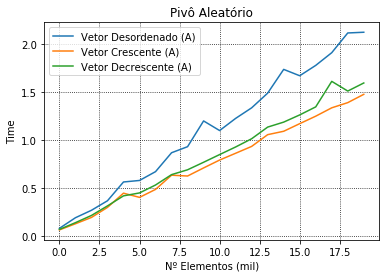

In [63]:
print("\n--------------------------")
print("100 Elementos -> Pivô aleatório.\n")

x = [random.randint(1,100) for l in range (100)]

print("Lista x Desornada:",x)
print("Lista x Ordenada:",quick_sort_modificado(x))

print("\n--------------------------\n")

print("->Pivô aleatório.\n")

tx_mod = []
tcresc_mod = []
tdecre_mod = []

i = 1000
while (i <= 20000):
  x_mod = [random.randint(1,i) for l in range (i)]
  cresc_mod = [l for l in range (i)]
  decre_mod = [l for l in range(i, 0, -1)]

  #Desordenado Modificado
  tx_mod.append(timeit.timeit(lambda:quick_sort_modificado(x_mod),number = 40))
  #"Crescente Modificado
  tcresc_mod.append(timeit.timeit(lambda:quick_sort_modificado(cresc_mod),number = 40))
  #Decrescente Modificado
  tdecre_mod.append(timeit.timeit(lambda:quick_sort_modificado(decre_mod),number = 40))
  i+=1000

print("Média Desordenado 1 000 - 20 000 elem.:",np.mean(tx_mod))
print("Média Crescente 1 000 - 20 000 elem.:",np.mean(tcresc_mod))
print("Média Decrescente 1 000 - 20 000 elem.:",np.mean(tdecre_mod))

plt.plot(num_elementos,tx_mod,label = 'Vetor Desordenado (A)')
plt.plot(num_elementos,tcresc_mod,label = 'Vetor Crescente (A)')
plt.plot(num_elementos,tdecre_mod,label = 'Vetor Decrescente (A)')
plt.legend()
plt.title("Pivô Aleatório")
plt.ylabel("Time")
plt.xlabel("Nº Elementos (mil)")
plt.grid(linestyle = ':', color = 'k')

plt.show()

## e)Pivô no meio x Pivô aletório (nas duas situações).

<font size = 4>
<br>
 A escolha do pivô é crucial para o bom desempenho do método, já que a fase de
partição é a parte crítica do algoritmo. Intuitivamente o pivô no meio pode parecer
uma boa escolha, mas em alguns casos não funciona bem, levando a o algoritmo a 
complexidade quadrática. Desse modo, quando não sabemos como os elementos estão arranjados,
podemos adicionar um fator de aleatoriedade na escolha do pivô. Analisando os resultados dos
dois algoritmos, principalmente nos de 20 000 execuções, percebemos uma diferença consideravel
entre o a ordenação de vetores com valores aleatoriamente distribuidos, e os vetores ordenados
crescentes e decrescentes.

## Questão 2

In [ ]:
coé

## Questão 3 - Implemente em uma linguagem de programação a sua escolha os algoritmos de ordenação linear CountingSort e BucketSort. Em seguida, trabalhe os itens abaixo.



In [ ]:
from counting_sort import counting_sort
from bucket_sort import bucket_sort

In [ ]:
def test_arrays(sort_algorithm, begin=10000, end=110000, increment=10000, iterations=1, 
                constant_high=False, constant_size=False, uniform_dist=True):
    
    steps = (end-begin)//increment
    times = np.zeros((iterations, steps))
    
    for e in range(steps):
        for j in range(iterations):
            high = begin if constant_high else e*increment+begin
            size = begin if constant_size else e*increment+begin
            
            if uniform_dist:
                vetor = np.random.randint(low=0, high = high, size = size)
            else:
                vetor = np.random.pareto(e*increment+begin, e*increment+begin)
            
            times[j,e] = sort_algorithm(vetor)[1]
    x = list(range(begin, end, increment))
    return x, np.median(times, axis=0)

def plot_graph(y, label_x, label_y, title="", x=None, hist=False):
    if hist:
        plt.hist(y, bins=y.shape[0]//100)
    else:
        plt.plot(x,y)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.show

### a. Analise o comportamento do tempo de execução do algoritmo CountingSort quando o número de elementos da sequência de entrada é aumentado gradativamente. Durante a análise, comente a relação que existe entre o tamanho da sequência de entrada e o elemento de maior valor nessa sequência. Usando dados reais, ilustre graficamente suas conclusões.


In [ ]:
x, time =  test_arrays(counting_sort, iterations=8, constant_high=True)
plot_graph(x=x,y=time,title='Counting Sort (Valor Máximo Constante)', 
           label_x="Tamanho do Vetor de Entrada", label_y="Tempo de Execução em Segundos")

###### O tempo de execução do Counting Sort cresce linearmente de acordo com o tamanho do vetor de entrada

In [ ]:
x, time = test_arrays(counting_sort, iterations=8, constant_size=True)
plot_graph(x=x, y=time, title='Counting Sort (Tamanho do Vetor de Entrada Constante)', 
           label_x="Valor Máximo do Vetor de Entrada", label_y="Tempo de Execução em Segundos")

###### O tempo de execução do Counting Sort cresce linearmente de acordo com o valor máximo do vetor

In [ ]:
X = np.resize(np.linspace(10**4, 10**5,10,dtype=int), (10,10))
Y = X.transpose(1,0)
Z = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        vetor = np.random.randint(low=0, high = Y[i,j]*4, size = X[i,j])
        Z[i,j] = counting_sort(vetor)[1]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, cmap = cm.coolwarm)
ax.set_xlabel("Tamanho do Vetor")
ax.set_ylabel("Maior Valor do Vetor")
ax.set_zlabel("Tempo(s)")
plt.show()

###### A partir dos gráficos, é possível confirmar a complexidade temporal do Counting Sort de O(n+k), sendo 'n' o tamanho do vetor de entrada e 'k' o valor máximo do vetor. O tempo de execução do algoritmo aumenta linearmente de acordo tanto com o tamanho do vetor como com o valor máximo do vetor.

### b. Compare o tempo de execução do algoritmo BucketSort quando o mesmo recebe como entrada sequências uniformemente distribuídas. Caso mais números fossem inseridos nas sequências, como o desempenho do algoritmo seria afetado? Usando dados reais, ilustre graficamente suas conclusões.

In [ ]:
numbers = np.random.uniform(0,10**4,10**4)
plot_graph(numbers, hist=True, title="Distribuição Uniforme", 
              label_x="Valor", label_y="Quantidade")

In [ ]:
x,time =  test_arrays(bucket_sort, iterations=3)
plot_graph(time,x=x, title="Bucket Sort", label_x="Tamanho do Vetor de Entrada", 
           label_y="Tempo de Execução em Segundos")

######  A complexidade no tempo do algoritmo Bucket Sort é linear, então o tempo de execução vai aumentar proporcionalmente conforme o  o tamanho do vetor de entrada para uma entrada 

In [ ]:
numbers = abs(np.random.normal(scale=100, size=10**4).astype(int))
plot_graph(numbers, hist=True, label_x="Valor", label_y="Quantidade", 
           title="Distribuição Não Uniforme")

In [ ]:
x, time_pareto = test_arrays(bucket_sort, end=60000, iterations=1, uniform_dist=False)
plt.plot(x,time[:5], label="Distribuição Uniforme")
plt.plot(x,time_pareto, label="Distribuição Não Uniforme")
plt.xlabel("Tamanho do Vetor de Entrada")
plt.ylabel("Tempo de Execução em Segundos")
plt.title("Bucket Sort")
plt.legend()
plt.show()

###### Através dos gŕaficos, podemos perceber que o algoritmo Bucket Sort é muito mais eficiente para vetores de entrada que possuem seus valores distribuidos de forma uniforme. 

## Questão 4

In [ ]:
fala